# In this Task
I concatenated the stories files into one dataframe, then I started to train different Machine Learning Algorithms to see how they will Perform on the data.

I used the following algorithms and the accuracies was:

1- For Naive Bayes: 81%

2- For Support Vector Machine: 84%

3- For Artificial Neural Network: 87%


In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
# concatenate the stories files into one dataframe
file_paths = ['/kaggle/input/hespress/stories_art-et-culture.csv', '/kaggle/input/hespress/stories_economie.csv','/kaggle/input/hespress/stories_faits-divers.csv','/kaggle/input/hespress/stories_marocains-du-monde.csv','/kaggle/input/hespress/stories_medias.csv','/kaggle/input/hespress/stories_orbites.csv','/kaggle/input/hespress/stories_politique.csv','/kaggle/input/hespress/stories_regions.csv','/kaggle/input/hespress/stories_societe.csv','/kaggle/input/hespress/stories_sport.csv','/kaggle/input/hespress/stories_sport.csv']
dfs = [pd.read_csv(file) for file in file_paths]
combined_df = pd.concat(dfs, ignore_index=True)

In [4]:
combined_df

,Unnamed: 0,id,title,date,author,story,topic
0,0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
1,1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
2,2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
3,3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
4,4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture
...,...,...,...,...,...,...,...
10995,995,15fbd328056011ebb35a646e69d991ea,ميلان الإيطالي يهتم بخدمات المغربي عمران لوزا,الثلاثاء 03 مارس 2020 - 02:40,أوعنا بلعيد,‪ يراهن مسؤولو أيس ميلان الإيطالي لكرة القدم ع...,sport
10996,996,16be81ee056011ebba28646e69d991ea,ثلاثية تمنح التفوق ليوسفية برشيد أمام طنجة,الاثنين 02 مارس 2020 - 21:19,هسبريس من الرباط,تمكن فريق يوسفية برشيد من الفوز بميدانه على ات...,sport
10997,997,17852270056011eb8c55646e69d991ea,"النصيري يحصد ثمار تألقه أمام أوساسونا بـ""لاليغا""",الاثنين 02 مارس 2020 - 20:35,أوعنا بلعيد,دخل النجم المغربي الشاب يوسف النصيري بسرعة وجي...,sport
10998,998,184c532c056011eb819b646e69d991ea,"حجي يستقيل من منصب الكاتب العام لـ""الكاف""",الاثنين 02 مارس 2020 - 18:01,هسبريس - و.م .ع,قدم الكاتب العام للكونفدرالية الإفريقية لكرة ا...,sport


# Model 1: Naive Bayes

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_df['story'], combined_df['topic'], test_size=0.2, random_state=42)

In [6]:
# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [7]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [8]:
# Make predictions
y_pred = nb_classifier.predict(X_test_vec)

In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8268181818181818
                    precision    recall  f1-score   support

    art-et-culture       0.91      0.82      0.86       206
          economie       0.81      0.87      0.84       202
      faits-divers       0.99      0.85      0.92       184
marocains-du-monde       0.86      0.77      0.81       214
            medias       0.60      0.91      0.72       197
           orbites       0.67      0.71      0.69       204
         politique       0.84      0.79      0.81       210
           regions       0.87      0.74      0.80       178
           societe       0.72      0.66      0.69       198
             sport       1.00      0.99      0.99       407

          accuracy                           0.83      2200
         macro avg       0.83      0.81      0.81      2200
      weighted avg       0.84      0.83      0.83      2200



# Model 2: Support Vector Machine

In [10]:
# training SVC on the data
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_vec, y_train)

SVC(kernel='linear', random_state=42)

In [11]:
# Make predictions
y_pred = svm_classifier.predict(X_test_vec)

In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8490909090909091
                    precision    recall  f1-score   support

    art-et-culture       0.92      0.89      0.90       206
          economie       0.80      0.81      0.80       202
      faits-divers       0.91      0.96      0.94       184
marocains-du-monde       0.85      0.85      0.85       214
            medias       0.94      0.88      0.91       197
           orbites       0.70      0.69      0.69       204
         politique       0.78      0.78      0.78       210
           regions       0.75      0.83      0.79       178
           societe       0.71      0.68      0.69       198
             sport       0.99      1.00      1.00       407

          accuracy                           0.85      2200
         macro avg       0.83      0.83      0.83      2200
      weighted avg       0.85      0.85      0.85      2200



# Model 3: Artificial Neural Network

In [13]:
# Convert string labels to integer labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [14]:
# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [15]:
X_train_array = X_train_vec.toarray()

In [16]:
# Train and evaluate the ANN classifier
num_classes = len(label_encoder.classes_)
input_dim = X_train_vec.shape[1]

In [17]:
# Model Architecture
model = Sequential([
    Dense(64, activation='relu', input_dim=input_dim),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax') ])

In [18]:
# compiling the model: I used Sparse Categorical Crossentropy as my loss function, Adam as an optimizer and accuracy as my metric
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train_array, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
248/248 [==============================] - 34s 132ms/step - loss: 1.5340 - accuracy: 0.4840 - val_loss: 0.7376 - val_accuracy: 0.8239
Epoch 2/10
248/248 [==============================] - 31s 124ms/step - loss: 0.9266 - accuracy: 0.7056 - val_loss: 0.5686 - val_accuracy: 0.8386
Epoch 3/10
248/248 [==============================] - 30s 119ms/step - loss: 0.6786 - accuracy: 0.7886 - val_loss: 0.5380 - val_accuracy: 0.8352
Epoch 4/10
248/248 [==============================] - 27s 111ms/step - loss: 0.5250 - accuracy: 0.8413 - val_loss: 0.5340 - val_accuracy: 0.8477
Epoch 5/10
248/248 [==============================] - 28s 112ms/step - loss: 0.4240 - accuracy: 0.8773 - val_loss: 0.5623 - val_accuracy: 0.8432
Epoch 6/10
248/248 [==============================] - 28s 111ms/step - loss: 0.3722 - accuracy: 0.8866 - val_loss: 0.5624 - val_accuracy: 0.8466
Epoch 7/10
248/248 [==============================] - 27s 110ms/step - loss: 0.3278 - accuracy: 0.8999 - val_loss: 0.5803 - val_ac

In [19]:
# Obtain model predictions and probabilities for both training and validation data
y_train_pred = model.predict(X_train_array)
y_val_pred = model.predict(X_test_vec)

69/69 [==============================] - 0s 3ms/step


In [20]:
# Make predictions for ANN
y_pred_ann_probs = model.predict(X_test_vec)
y_pred_ann = np.argmax(y_pred_ann_probs, axis=-1)  # Get the index of the maximum probability

69/69 [==============================] - 0s 3ms/step


In [21]:
# Convert integer labels back to string labels
y_pred_ann_labels = label_encoder.inverse_transform(y_pred_ann)
y_test_labels = label_encoder.inverse_transform(y_test_encoded)

In [22]:
# Evaluate the ANN model
accuracy_ann = accuracy_score(y_test_labels, y_pred_ann_labels)
print("Accuracy (ANN):", accuracy_ann)
print(classification_report(y_test_labels, y_pred_ann_labels))

Accuracy (ANN): 0.8668181818181818
                    precision    recall  f1-score   support

    art-et-culture       0.86      0.92      0.89       206
          economie       0.81      0.84      0.82       202
      faits-divers       0.94      0.96      0.95       184
marocains-du-monde       0.87      0.86      0.86       214
            medias       0.95      0.89      0.92       197
           orbites       0.72      0.72      0.72       204
         politique       0.82      0.84      0.83       210
           regions       0.80      0.84      0.82       178
           societe       0.78      0.67      0.72       198
             sport       0.99      1.00      1.00       407

          accuracy                           0.87      2200
         macro avg       0.85      0.85      0.85      2200
      weighted avg       0.87      0.87      0.87      2200



# Plotting the loss curve and Accuracy curve

In [27]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

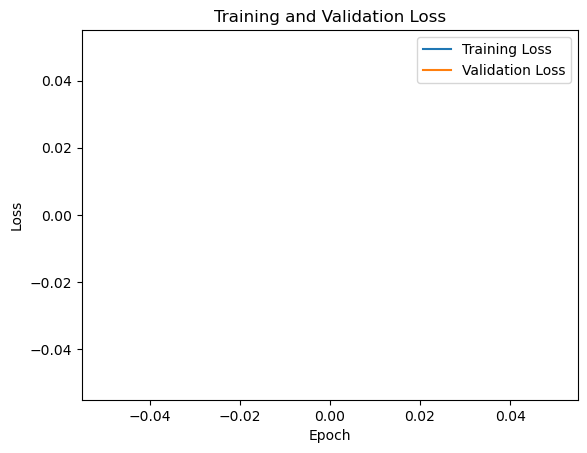

In [30]:
# Create a plot for the loss
plt.figure()
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

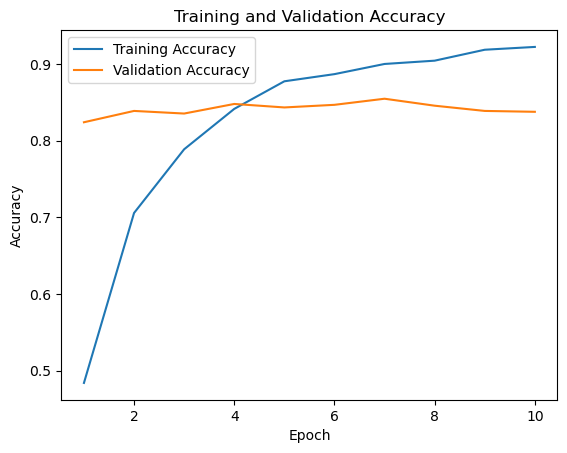

In [29]:
# Create a plot for the accuracy
plt.figure()
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()